In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pickle

In [2]:
strks_pts = pd.read_csv('streaks_points.csv')
rankings = pd.read_csv('Elo_Rankings2017.csv')

strks_pts['Elo'] = rankings.points[:101]
#strks_pts['chidf_ratio'] = strks_pts.chi2.values / strks_pts.kmax.values

In [3]:
# Add significance column, Bonferroni corrected
isSig = ['Yes' if p < (0.05/100) else 'No' for p in strks_pts['p-val'] ]
strks_pts['Significant'] = isSig

In [5]:
lm_points = pickle.load(open('point_prob_model.sav', 'rb'))
# Federer 2444
# 1968

lm_points.predict_proba(np.array([[1968 - 2444, 3.0]]))

array([[0.55884713, 0.44115287]])

In [26]:
strks_pts

,name,Player,kmax,chi2,p-val,Elo,Significant
0,Roger Federer,Roger Federer,15.0,417.672217,0.000000,2444,Yes
1,Novak Djokovic,Novak Djokovic,15.0,425.592014,0.000000,2418,Yes
2,Andy Murray,Andy Murray,15.0,389.338743,0.000000,2353,Yes
3,Rafael Nadal,Rafael Nadal,15.0,265.191658,0.000000,2350,Yes
4,Juan Martin Del Potro,Juan Martin Del Potro,15.0,46.087044,0.000027,2243,Yes
...,...,...,...,...,...,...,...
96,Filip Krajinovic,Filip Krajinovic,15.0,16.971980,0.257674,1842,No
97,Thomaz Bellucci,Thomaz Bellucci,15.0,35.419467,0.001274,1834,No
98,Yen Hsun Lu,Yen Hsun Lu,15.0,23.360807,0.054646,1832,No
99,Tommy Haas,Tommy Haas,15.0,17.691379,0.221200,1831,No


In [22]:
strks_pts_sorted = strks_pts.sort_values('p-val')
fig = px.bar(strks_pts_sorted, x='Player', y='p-val', color='Significant')
#fig.update_xaxes(visible=False, showticklabels=True)
fig.show()

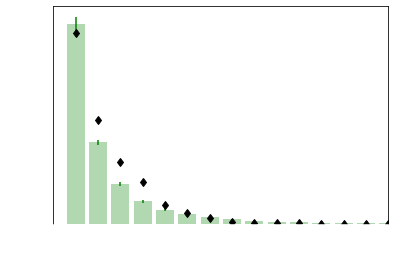

In [8]:
federer_data = pickle.load(open('federer_data.sav', 'rb'))
mu = federer_data['mu']
sig = federer_data['sig']
counts = federer_data['counts']
kmax = federer_data['kmax']

fig,ax = plt.subplots()
kvals = 1+np.arange(kmax)
ax.bar(kvals,mu[:kmax],alpha=0.3,color='g',yerr=sig[:kmax], ecolor='g')
ax.set_xticks(kvals)
ax.set_xlim(0,kmax)
if not False:
    ax.plot(kvals,counts[:kmax],'kd')
ax.set_xlabel('Streak Lengths')
ax.set_ylabel('Number of Streaks')

#ax.set_title("Federer Streak Distribution")
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('plots/Federer_Plot.png')

In [29]:
fig = px.scatter(strks_pts, x='Elo', y='chi2', color='Significant',
                    hover_data=['name'], size=np.repeat(5,101))
fig.show()

In [8]:
strks_pts.iloc[:25]


,name,Player,kmax,chi2,p-val
0,Roger Federer,Roger Federer,14.0,402.812037,0.000000e+00
1,Novak Djokovic,Novak Djokovic,13.0,399.664918,0.000000e+00
2,Andy Murray,Andy Murray,15.0,392.319272,0.000000e+00
3,Rafael Nadal,Rafael Nadal,15.0,265.890069,0.000000e+00
4,Juan Martin Del Potro,Juan Martin Del Potro,9.0,33.825160,4.369930e-05
5,Stan Wawrinka,Stan Wawrinka,12.0,202.685100,0.000000e+00
6,Grigor Dimitrov,Grigor Dimitrov,14.0,147.240056,0.000000e+00
7,Kei Nishikori,Kei Nishikori,10.0,189.474951,0.000000e+00
8,Milos Raonic,Milos Raonic,14.0,272.464996,0.000000e+00
9,David Goffin,David Goffin,14.0,84.340998,1.670886e-12
